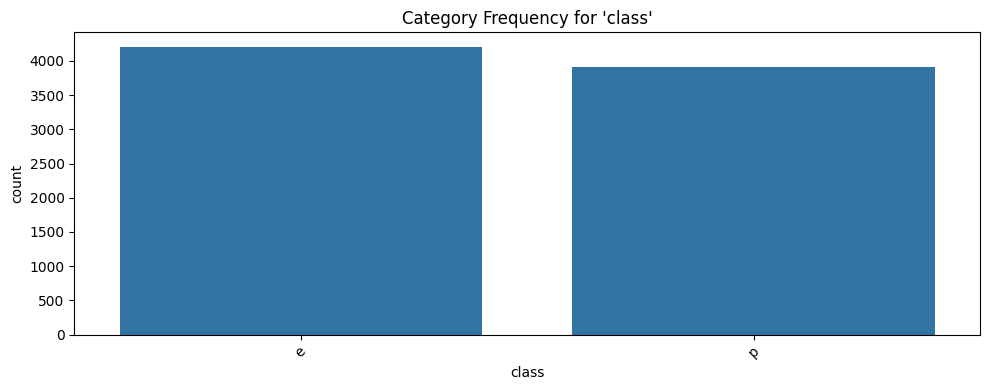

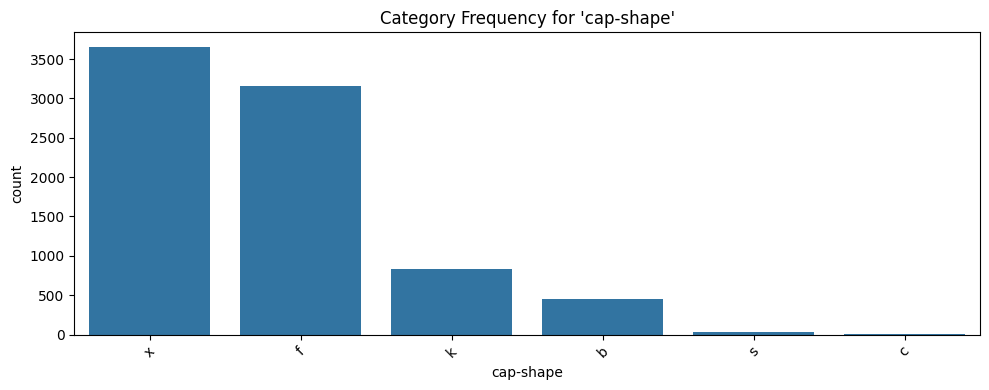

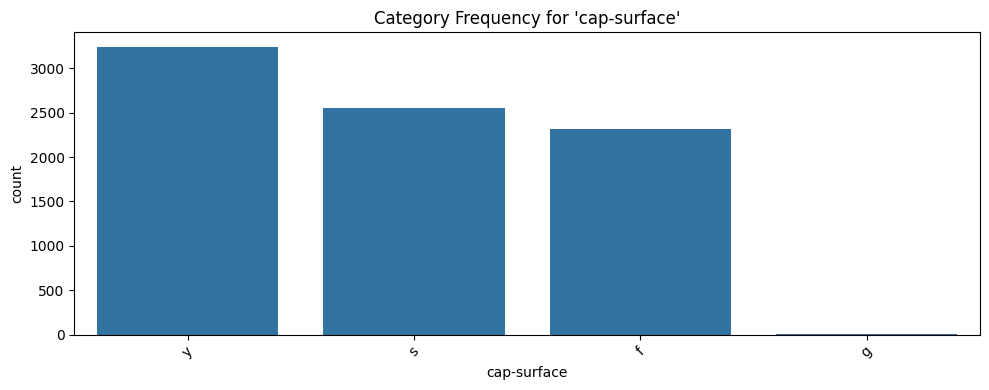

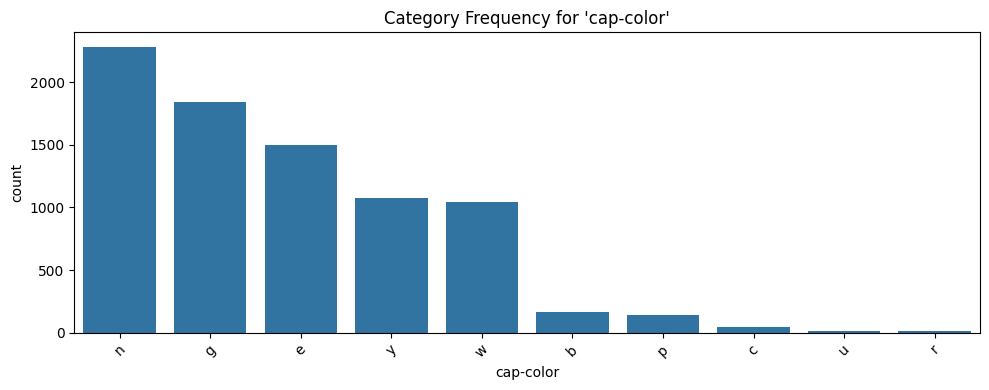

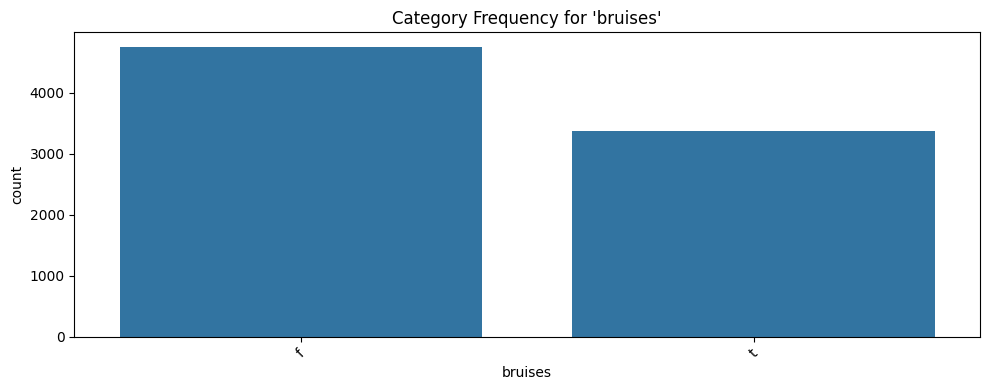

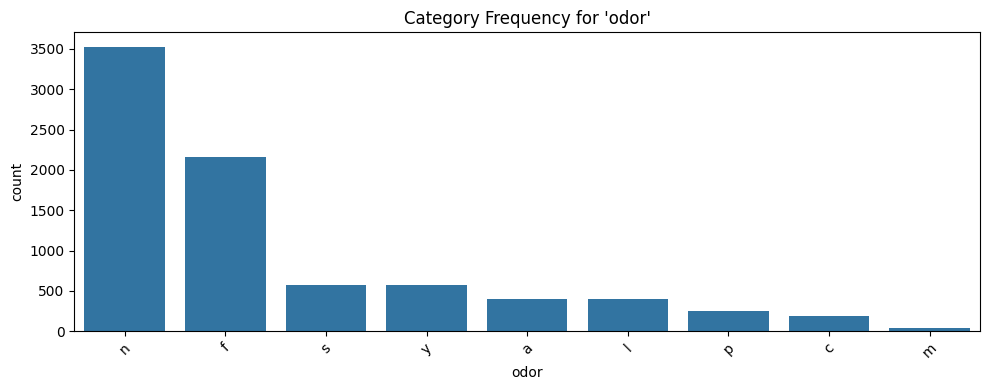

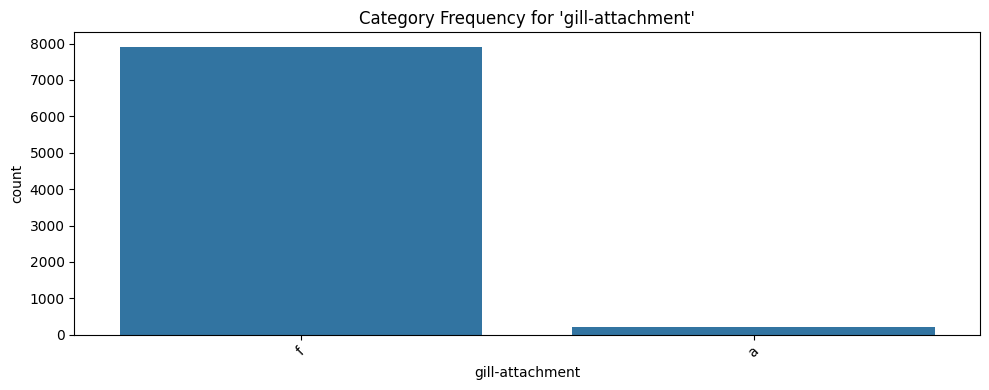

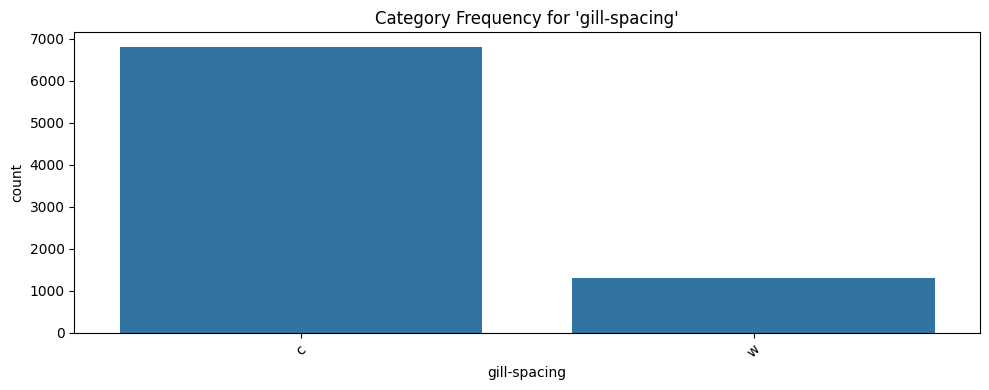

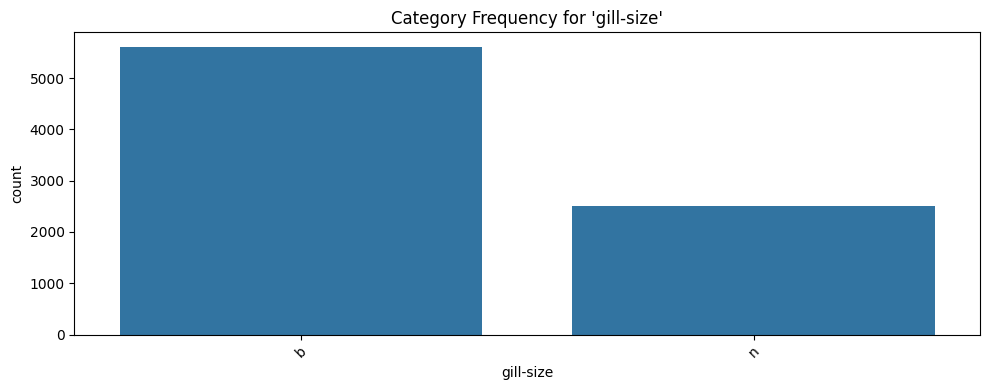

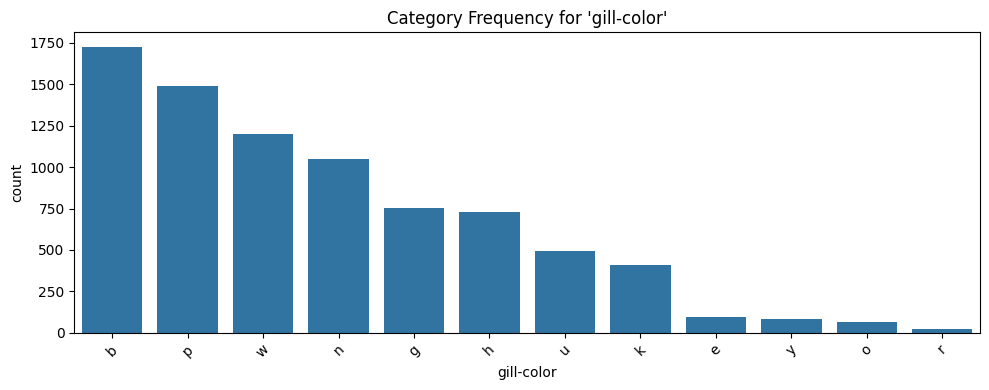

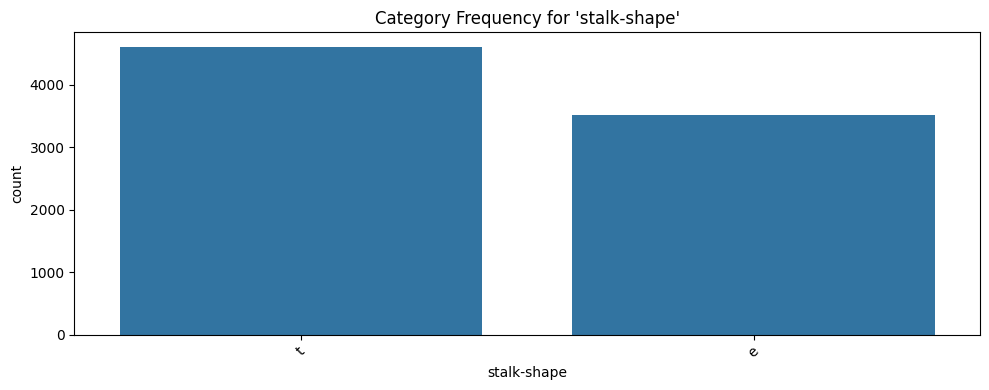

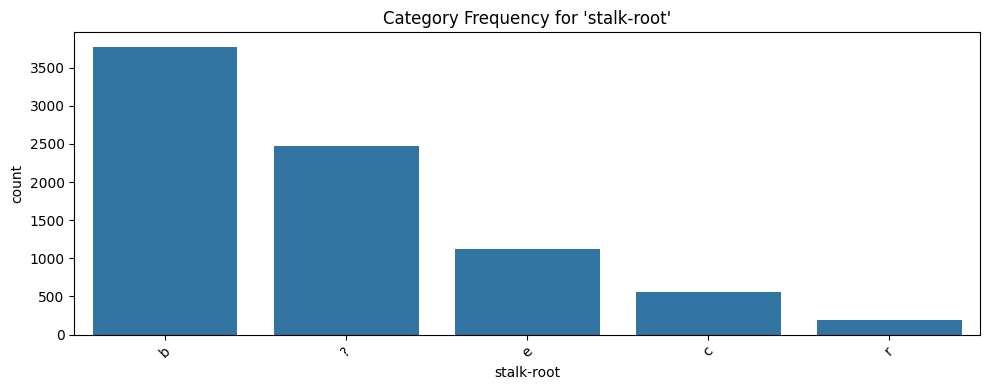

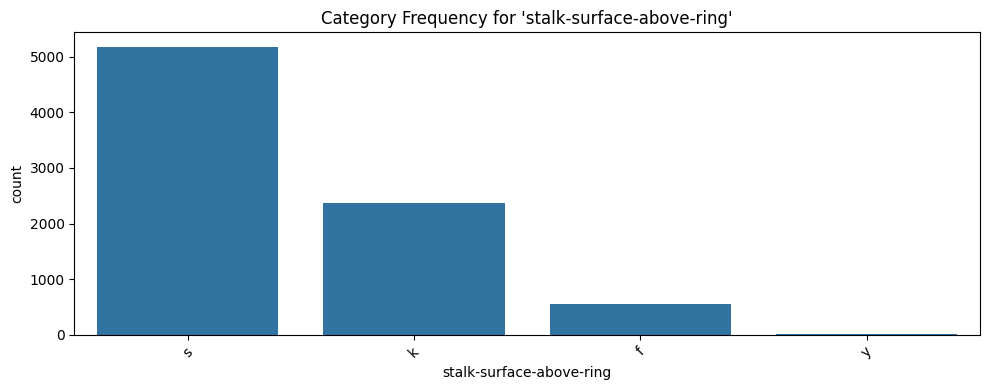

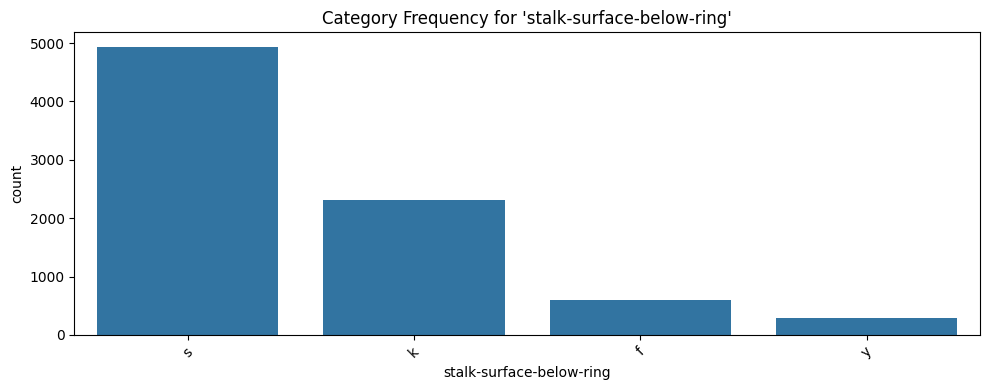

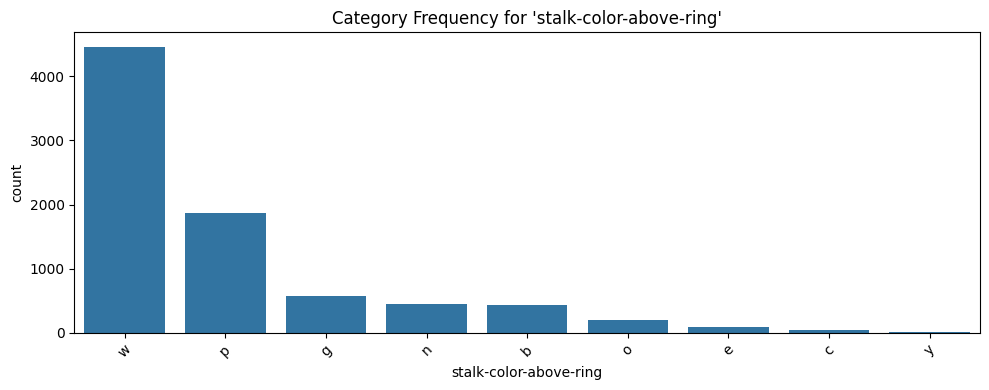

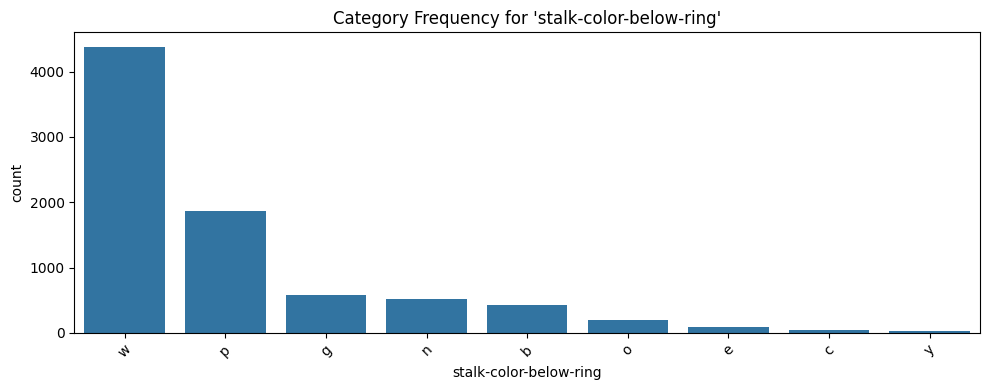

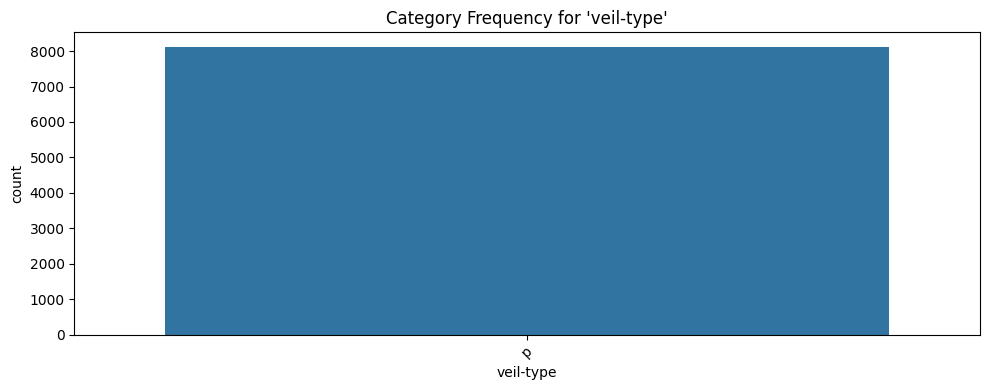

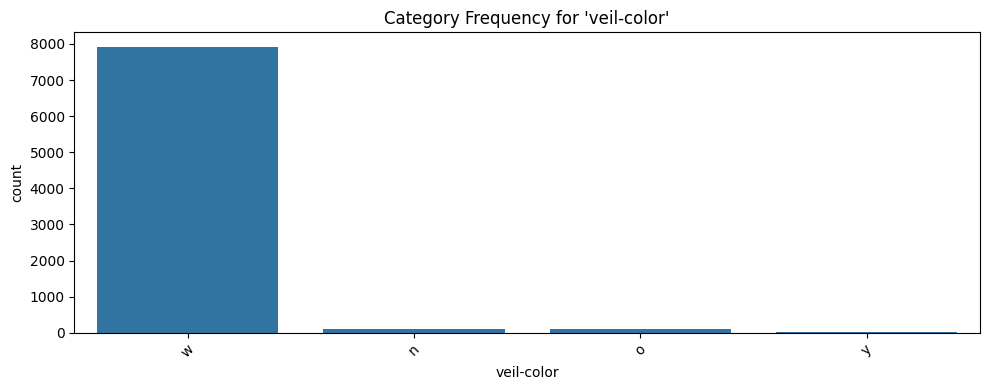

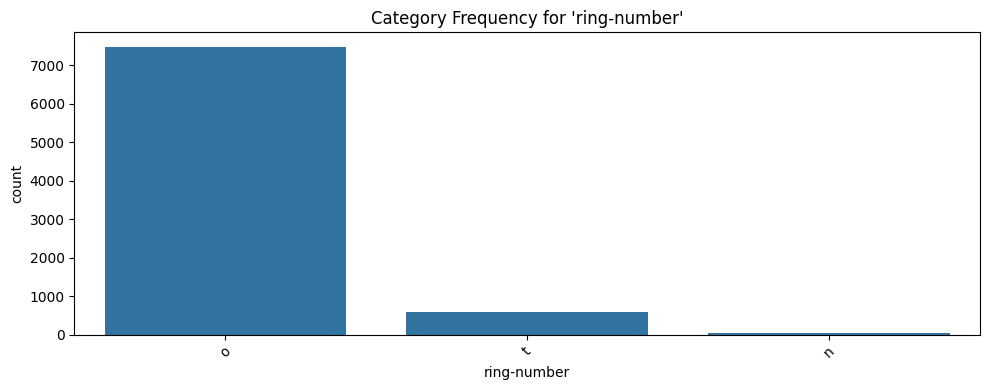

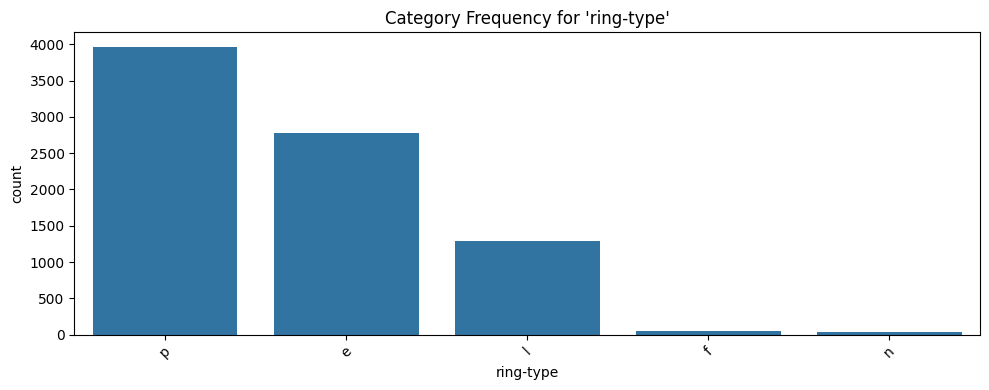

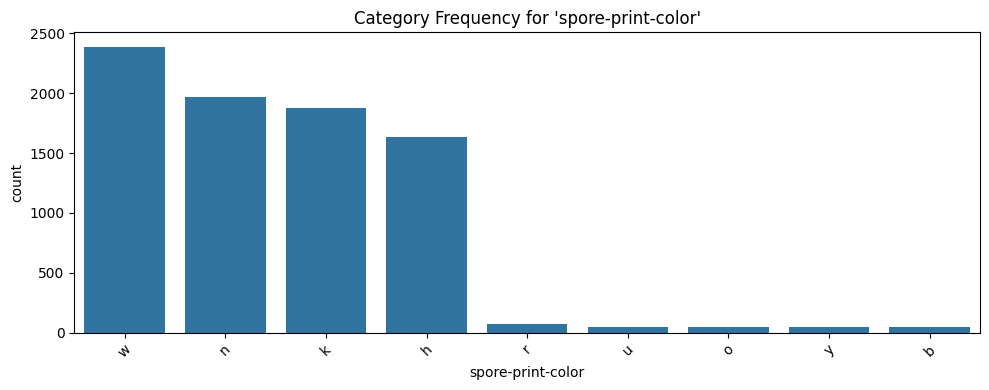

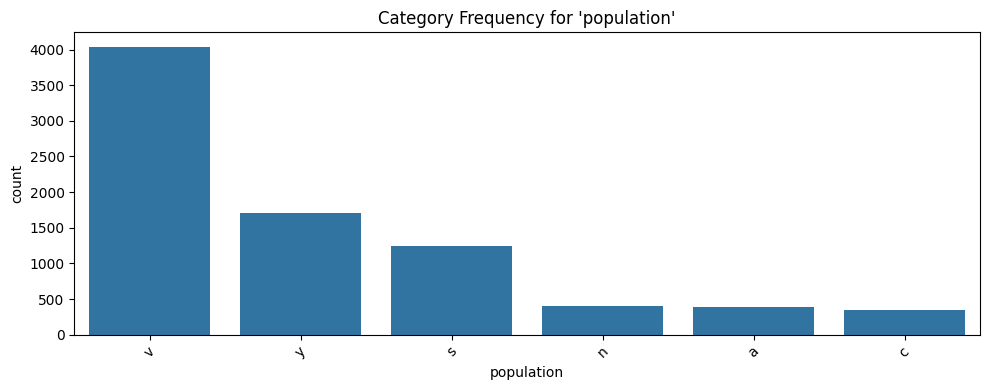

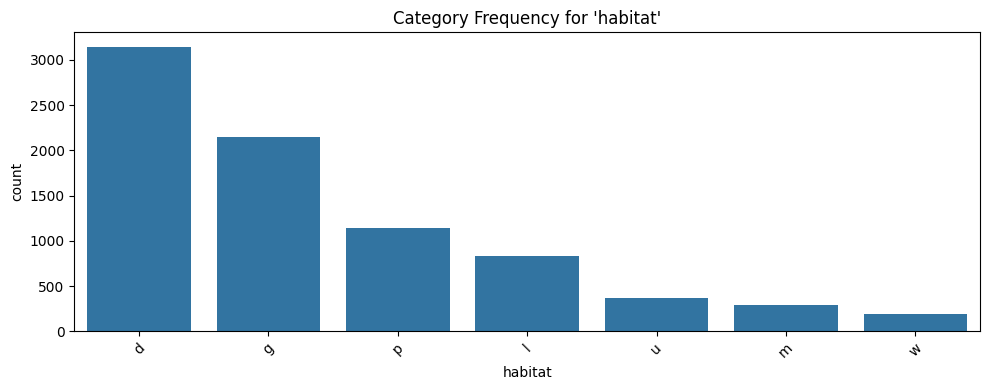

In [13]:
#FIRSTLY IMPORTING THE LIBRARY PANDAS FOR READING THE DATASET
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# LOADING AND PRINTING THE DATASET
#CURRENTLY PRINTING THE HEAD TO KNOW ABOUT THE DATA SET VALUES IN EACH COLUMN FOR AN EXAMPLE THAT THE VALUES ARE IN STRING OR NUMBERS
#data_set = pd.read_csv('mushrooms.csv.csv')
#print(data_set.head())


#TO FIND OUT ANY MISSING VALUES IN THE DATASET
#AND THERE IS NO MISSING VALUES IN THIS DATASET , THAT'S WHY IT ALL SHOWING NON ZERO TERMS
#print(data_set.isnull().sum())

#TO KNOW THE DATA TYPES IN THE DATA SET
#print(data_set.dtypes)

#THIS IS TO OVERVIEW THE COLUMNS SAME AS IN DTYPE ATTRIBUTE SHOWN ABOVE, IT WILL SHOW THE COLUMNS WITHOUT NULL COUNTS(VOID)
#print(data_set.info())

#CHECK THE STATS OF NUMERIC COLUMNS , SRUTHY REMEMBER OUR DATA TYPES ARE OBJECTS , SO USE THIS IN NUMERICAL ONE OR ELSE IT WONT SHOW
#print(data_set.describe())

#THIS IS FOR DETECTING THE DUPLICATES IN THE DATASET
#duplicates = data_set.duplicated().sum()
#print(f"Number of duplicate rows: {duplicates}")

# THIS FOR REMVOING THE DUPLICATES
#data_set = data_set.drop_duplicates()

#IT IS THE LAST IN CLEANING SECTION AND IT WILL SAVE THE CLEANED DATASET
#data_set.to_csv('mushrooms_cleaned.csv', index=False)

# DETECTING THE OUTLIERS USING BOXPLOT IN SEABORN AND IN THIS I AM GOING TO DETECT THE OUTLIERS HIDDEN IN STALK-ROOT COLUMN
#AND YOU CAN CHANGE TO ANY COLUMN
#plt.figure(figsize=(10, 5))
#sns.boxplot(data=data_set['stalk-root'])  
#plt.title('Outliers in stalk-root')
#plt.show()


#SO WE HAVE FIND AN OUTLIER IN STALK ROOT COLUMN AND WE CAN DO TO REPLACE THE OUTLIER AS NAN AND CAN REMOVE THE NAN  
#OR CHANGE THE OUTLIER WITH MOST FREQUENT VALUE(MODE)
#[0] IS FOR PICKING THE FIRST MOST COMMON VALUE FROM THE SERIES, IT BECAUSE SOMETIMES MORE THAN ONE VALUE CAN BE MOST FREQUENT(TT WILL TIE),
#SO MODE WILL RETURN MULTIPLE VALUES 
#most_common = data_set['stalk-root'].mode()[0]
#data_set['stalk-root'].fillna(most_common, inplace = True)

#IT IS FOR DETECTING THE COUNTS OF VALUES IN ALL DATA SETS
#for col in data_set.columns:
 #   print(f"\nValue counts for {col}:\n")
  #  print(data_set[col].value_counts().sort_values().head())


#for col in data_set.columns: # IT IS TO PLOT THE ABOVE CODE
 #   plt.figure(figsize=(8, 4))
  #  value_counts = data_set[col].value_counts(normalize=True).sort_values(ascending=False)
   # sns.barplot(x=value_counts.values, y=value_counts.index, palette="coolwarm")
    #plt.title(f"Proportion of values in '{col}'")
    #plt.xlabel("Proportion")
    #plt.ylabel("Categories")
    #plt.tight_layout()
    #plt.show()

#ANOTHER WAY OF PLOTTING THE VALUE COUNTS AND INDIRECTLY WE CAN SAY IT AS FINDING THE UNIQUE VALUE
for col in data_set.columns:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(x=col, data=data_set, order=data_set[col].value_counts().index)
    plt.title(f"Category Frequency for '{col}'")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Decision Tree Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Decision Tree Mean Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



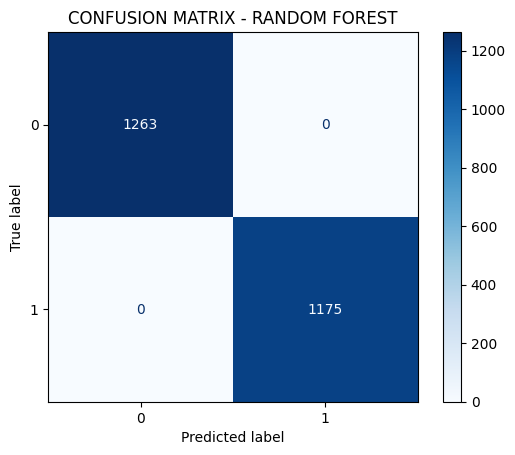

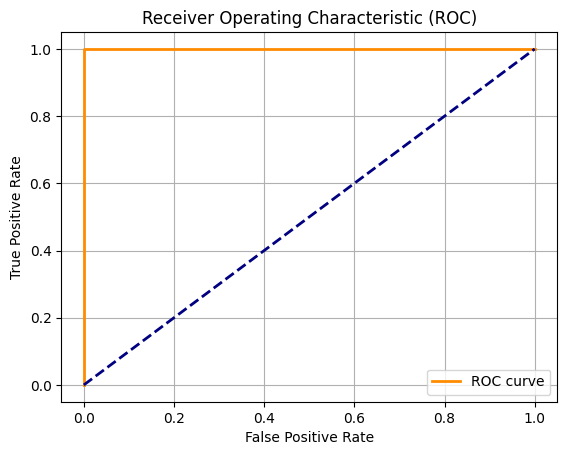

In [18]:
#IMPORTING SKLEARN LIBRARY AND MODEL TRAIN TEST SPLIT FOR SPLITTING THE DATA SET INTO TESTING AND TRAINING.
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

#IMPORTING LABEL ENCODER FROM SKLEARN LIBRARY TO CONVERT THE STRINGS IN THE DATASET INTO NUMBERS 
#BECAUSE MACHINE LEARNING MODELS ONLY UNDERSTANDS NUMBERS
from sklearn.preprocessing import LabelEncoder

#IMPORTING THE ALGORITHM DECISION TREE CLASSIFIFER FROM SKLEARN LIBRARY TO TRAIN THE MODEL.
from sklearn.tree import DecisionTreeClassifier

#IMPORTING THE ALGORITHM RANDOM FOREST CLASSIFIFER FROM SKLEARN LIBRARY TO TRAIN THE MODEL.
from sklearn.ensemble import RandomForestClassifier

#IMPORTING CLASSIFICATION REPORT , CONFUSION MATRIX AND CONFUSION MATRIX DISPLAY FROM SKLEARN LIBRARY TO EVALUATE THE MODEL, 
#MAINLY TO KNOW HOW THE MODEL PERFORMED AND ACCURACY TEST
from sklearn.metrics import (classification_report,
confusion_matrix,
ConfusionMatrixDisplay, 
accuracy_score, 
precision_score, 
recall_score, 
f1_score)

#IMPORTING THE ROC CURVE FROM SKLEARN TO VISUALLISE THE THRESHOLD IMPACT THAT HOW IT AFFECTS TRUE POSITIVE AND FALSE POSITIVE RATE
from sklearn.metrics import roc_curve

#IMPORTING PYPLOT FROM MATPLOTLIB LIBRARY FOR GRAPHICAL REPRESENTATION
import matplotlib.pyplot as plt


#IMPORTING SEABORN FOR CLEAN AND CLEAR VISUALLISATION.
import seaborn as sns



# ENCODING CATEGORICAL FEATURES USING LABEL ENCODER
#USING THE FOR LOOP FOR ITERATION BECAUSE OF THE DATA SET, THAT IT INVOLVES LARGE NUMBER OF DATAS. 
#THIS LOOP ITERATE FROM THE DATA TO DATA IN ALL COULUMNS IN THE DATA SET.
#THE FIT TRANFORM WILL SCAN THE STRINGS AND REPLACES IT WITH NUMBERS
label_encoders = {}
for col in data_set.columns:
    le = LabelEncoder()
    data_set[col] = le.fit_transform(data_set[col])
    label_encoders[col] = le

   


# SPLITTING THE FEATURES AND VARIABLES EXCEPT THE TARGET VARIABLE NAME "CLASS"
#AND y IS THE TARGET VARIABLE THAT WE NEED TO PREDICT
X = data_set.drop('class', axis=1)
y = data_set['class']

# TRAINING DATA AND TESTING DATA SPLITTING
#70% OF OUR DATA GOES INTO TRAINING AND 30% DATA INTO TESTING.
#YOU CAN CHANGE THE TRAIN AND TEST TO SEE DIFFERENT RESULTS.
#RANDOM STATE IS TO MAKE SURE THAT THE SPLIT IS REPRODUCIBLE.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)



#================================================================
# RANDOM FOREST CLASSIFIER
#================================================================

# TRAINING THE MODEL USING THE ALGORITHM RANDOM FOREST CLASSIFIER.
#CALLING THE ALGORITHM INTO MODEL.
random_forest_model = RandomForestClassifier(random_state = 42)
random_forest_model.fit(X_train, y_train)


#CROSS VALIDATION

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)


# CROSS VALIDATION scores
random_forest_cv_scores = cross_val_score(random_forest_model, X, y, cv=cv, scoring='accuracy')
#rf_cv_scores = cross_val_score(random_forest, X, y, cv=cv, scoring='accuracy')

print("\nDecision Tree Cross-Validation Accuracy Scores:", random_forest_cv_scores)
print("Decision Tree Mean Accuracy:", random_forest_cv_scores.mean())

#print("\nRandom Forest Cross-Validation Accuracy Scores:", rf_cv_scores)
#print("Random Forest Mean Accuracy:", rf_cv_scores.mean())




#FINAL STAGE :- EVALUATING THE MODEL PERFORMANCE AND MAKING PREDICTIONS
#MAKING PREDICTIONS IN RANDOM_FOREST_PRED VARIABLE
#EVALUATING THE MODEL PERFORMANCE BY MEASURING THE MODEL ACCURACY , PRECISION ETC. AND THE MODEL IS 100% PERFECTLY FITTED.
#THRESHOLD TUNING
#TARGETTING THE PROBABILITIES OF CLASS 1
random_forest_prob = random_forest_model.predict_proba(X_test)[:,1]
threshold = 0.8   #sruthy you can enter the value to 0.3 for more true positive value
random_forest_pred = (random_forest_prob >= threshold).astype(int)
#random_forest_pred = random_forest_model.predict(X_test)
print(classification_report(y_test, random_forest_pred))


#+++++++++++++++++++++
#CONFUSION MATRIX DEPLOYING FOR RANDOM FOREST CLASSIFIER
#+++++++++++++++++++++

#cm_random_forest ,CALCULATES THE CONFUSION MATRIX USING TRUE LABELS (y_test) AND PREDICTED LABELS (random_forest_pred).
#THIS LINE CREATES A CONFUSION MATRIX DISPLAY OBJECT (disp_random_forest).
#confusion_matrix = cm_random_forest: USES THE MATRIX CALCULATED ABOVE.
#Display_labels = random_forest_model.classes_: SHOWS THE CLASS NAMES ON THE AXES, BASED ON THE MODEL’S TRAINING DATA.
#disp_random_forest.plot THIS LINE PLOTS THE CONFUSION MATRIX USING A BLUE COLOR MAP (cmap = plt.cm.Blues), -
#WHICH MAKES IT VISUALLY EASIER TO INTERPRET.
#plt.title("CONFUSION MATRIX - RANDOM FOREST") THIS SETS THE TITLE OF THE PLOT TO “CONFUSION MATRIX - RANDOM FOREST”.
#THIS DISPLAYS THE PLOT USING plt.show()
cm_random_forest = confusion_matrix(y_test, random_forest_pred)
disp_random_forest = ConfusionMatrixDisplay(confusion_matrix = cm_random_forest, display_labels = random_forest_model.classes_)
disp_random_forest.plot(cmap = plt.cm.Blues)
plt.title("CONFUSION MATRIX - RANDOM FOREST")
plt.show()


#ROC CURVE

#fpr, tpr, thresholds = roc_curve(y_test, random_forest_prob)
#plt.plot(thresholds, tpr, label = 'TPR')
#plt.plot(thresholds, fpr, label = 'FPR')
#plt.xlabel("THRESHOLD BOUNDARY")
#plt.ylabel("RATE")
#plt.legend()
#plt.title("TPR/FPR VS THRESHOLD")
#plt.show()


fpr, tpr, _ = roc_curve(y_test, random_forest_prob)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()




#IF YOU WANT NORMALISE VERSION(ONLY PERCENTAGE) OF CONFUSION MATRIX , REMOVE THE COMMANDS (#) FROM BELOW CODE.
#cm_random_forest = confusion_matrix(y_test, random_forest_pred)
#disp_random_forest = ConfusionMatrixDisplay.from_estimator(random_forest_model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
#plt.title("CONFUSION MATRIX - RANDOM FOREST (NORMALIZED)")
#plt.show()

In [15]:
#NO NEED FOR THRESHOLDING BECAUSE THE MODEL IS HIGH CONFIDENT

print(random_forest_prob.min(), random_forest_prob.max())


0.0 1.0



Decision Tree Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Decision Tree Mean Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



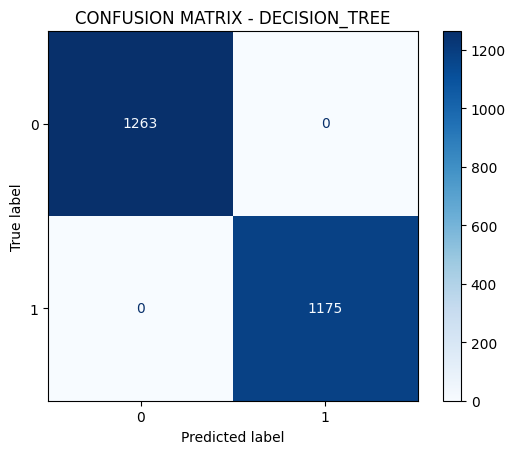

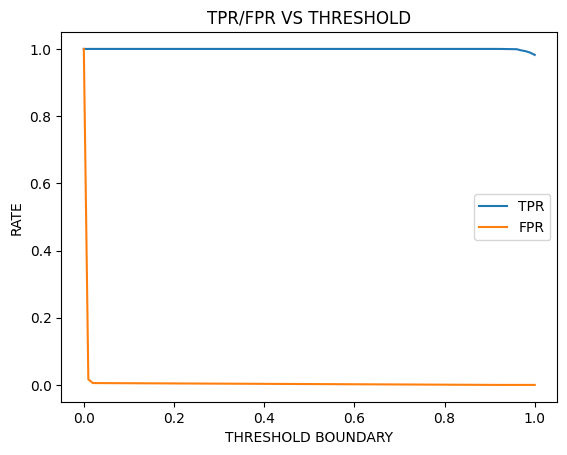

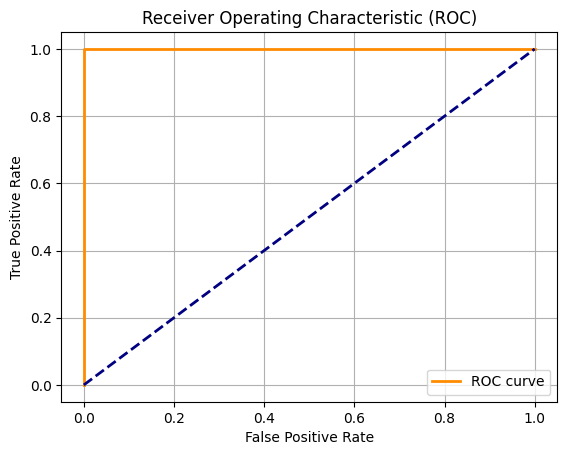

In [43]:
#================================================================
#DECISION TREE CLASSIFIER
#================================================================

# TRAINING THE MODEL USING THE ALGORITHM DECISION TREE CLASSIFIER.
#CALLING THE ALGORITHM INTO MODEL.
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)


#CROSS VALIDATION

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)


# CROSS VALIDATION scores
decision_tree_cv_scores = cross_val_score(decision_tree_model , X, y, cv=cv, scoring='accuracy')


print("\nDecision Tree Cross-Validation Accuracy Scores:", decision_tree_cv_scores)
print("Decision Tree Mean Accuracy:", decision_tree_cv_scores.mean())



#FINAL STAGE :- EVALUATING THE MODEL PERFORMANCE AND MAKING PREDICTIONS
#MAKING PREDICTIONS IN Y_PRED VARIABLE
#EVALUATING THE MODEL PERFORMANCE BY MEASURING THE MODEL ACCURACY , PRECISION ETC. AND THE MODEL IS 100% PERFECTLY FITTED.
#THRESHOLD TUNING
#TARGETTING THE PROBABILITIES OF CLASS 1
decision_tree_prob = decision_tree_model.predict_proba(X_test)[:,1]
threshold = 0.7  #sruthy you can enter the value to 0.3 for more true positive value
decision_tree_pred = (decision_tree_prob>= threshold).astype(int)

#decision_tree_pred = decision_tree_pred.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)
print(classification_report(y_test, decision_tree_pred))



#+++++++++++++++++++++
#CONFUSION MATRIX DEPLOYING FOR DECISION TREE CLASSIFIER
#+++++++++++++++++++++

#cm_decision_tree ,CALCULATES THE CONFUSION MATRIX USING TRUE LABELS (y_test) AND PREDICTED LABELS (decision_tree_pred).
#THIS LINE CREATES A CONFUSION MATRIX DISPLAY OBJECT (disp_decision_tree).
#confusion_matrix = cm_decision_tree: USES THE MATRIX CALCULATED ABOVE.
#Display_labels = decision_tree_model.classes_: SHOWS THE CLASS NAMES ON THE AXES, BASED ON THE MODEL’S TRAINING DATA.
#disp_decision_tree.plot THIS LINE PLOTS THE CONFUSION MATRIX USING A BLUE COLOR MAP (cmap = plt.cm.Blues), -
#WHICH MAKES IT VISUALLY EASIER TO INTERPRET.
#plt.title("CONFUSION MATRIX -  DECISION TREE") THIS SETS THE TITLE OF THE PLOT TO “CONFUSION MATRIX - DECISION TREE”.
#THIS DISPLAYS THE PLOT USING plt.show()
cm_decision_tree = confusion_matrix(y_test, decision_tree_pred)
disp_decision_tree = ConfusionMatrixDisplay(confusion_matrix = cm_decision_tree, display_labels = decision_tree_model.classes_)
disp_decision_tree.plot(cmap = plt.cm.Blues)
plt.title("CONFUSION MATRIX - DECISION_TREE")
plt.show()


#ROC CURVE

fpr, tpr, thresholds = roc_curve(y_test, random_forest_prob)
plt.plot(thresholds, tpr, label = 'TPR')
plt.plot(thresholds, fpr, label = 'FPR')
plt.xlabel("THRESHOLD BOUNDARY")
plt.ylabel("RATE")
plt.legend()
plt.title("TPR/FPR VS THRESHOLD")
plt.show()


fpr, tpr, _ = roc_curve(y_test, random_forest_prob)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


#IF YOU WANT NORMALISE VERSION(ONLY PERCENTAGE) OF CONFUSION MATRIX , REMOVE THE COMMANDS (#) FROM BELOW CODE.
#cm_decision_tree = confusion_matrix(y_test, decision_tree_pred)
#disp_decision_tree = ConfusionMatrixDisplay.from_estimator(decision_tree_model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
#plt.title("CONFUSION MATRIX - DECISION TREE (NORMALIZED)")
#plt.show()

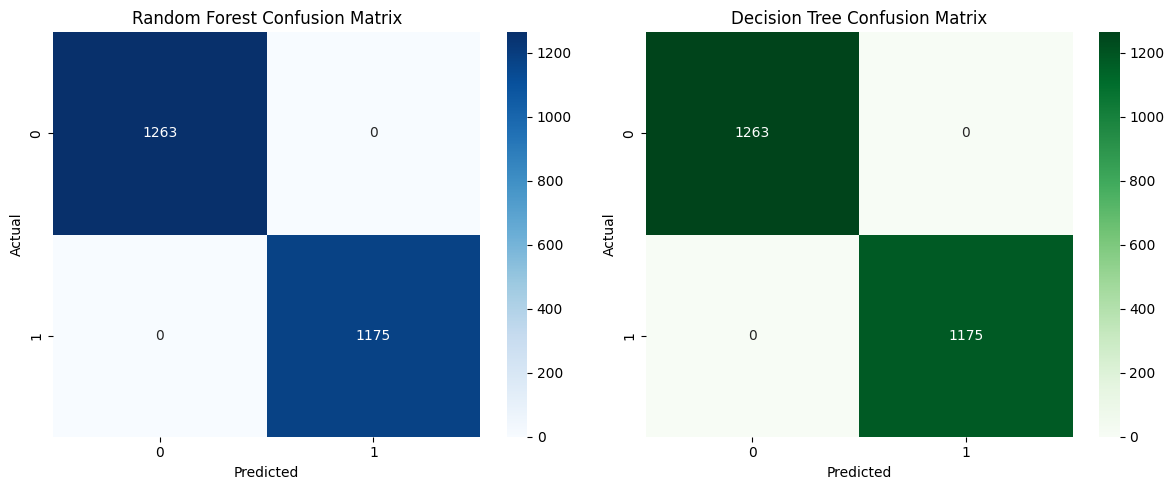

In [39]:
#==================================================
#PLOT SIDE BY SIDE CONFUSION MATRIX
#==================================================


#fig, axes = plt.subplots(1, 2) CREATES A FIGURE WITH 1 ROW AND 2 COLUMNS OF SUBPLOTS.
#figsize=(12, 5) SETS THE OVERALL FIGURE SIZE.

#sns.heatmap, DRAWS A HEATMAP FOR THE RANDOM FOREST CONFUSION MATRIX AND DECISION TREE CONFUSION MATRIX (cm_random_forest).
#annot=True DISPLAYS THE NUMERIC VALUES INSIDE THE CELLS.
#fmt="d" FORMATS THE NUMBERS AS INTEGERS.cmap="Blues" COLORS THE HEATMAP USING SHADES OF BLUE. ax=axes[0] SPECIFIES THE LEFT SUBPLOT.
# set.title AND axes[0] SETS THE TITLE AXIS OF THE LABELS FOR THE RANDOM FOREST CONFUSION MATRIX AND DECISION TREE CONFUSION MATRIX.
# xlabel and ylabel  SETS THE LABELS FOR X AND Y AXIS.

#tight_layout() ADJUSTS SPACING TO PREVENT OVERLAPPING TEXT.
#plt.show() DISPLAYS THE FINAL COMBINED PLOT.


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_random_forest, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_decision_tree, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()



In [40]:
# =======================
# CREATE A PERFORMANCE COMPARISON TABLE
# =======================

# metrics_data = {} DEFINE A DICTIONARY WITH METRICS
# "Model": ["RANDOM FOREST", "DECISION TREE"]  DEFINES THE MODEL NAMES AS ROW HEADERS.
# CALCULATES ACCURACY FOR EACH MODEL USING accuracy_score().
#CALCULATES PRECISION FOR EACH MODEL USING precision_score().
#CALCULATES RECALL FOR EACH MODEL USING recall_score().
#CALCULATES F1-SCORE FOR EACH MODEL USING f1_score().
# average='weighted' IS USED TO HANDLE MULTI-CLASS CASES, CONSIDERING CLASS IMBALANCE
#metrics_df = pd.DataFrame(metrics_data) CONVERTS THE DICTIONARY TO A PANDAS DATAFRAME FOR EASY TABULAR DISPLAY.
#print("\n===== MODEL PERFORMANCE COMPARISON =====") FOR PRINTING THE TITLE
#print(metrics_df.round(4)) PRINTS THE PERFORMANCE TABLE TO THE CONSOLE AND ROUND(4) GIVES THE VALUE DECIMAL PLACE UPTO 4.





metrics_data = {
    "Model": ["RANDOM FOREST", "DECISION TREE"],
    "Accuracy": [
        accuracy_score(y_test, random_forest_pred),
        accuracy_score(y_test, decision_tree_pred)
    ],
    "Precision": [
        precision_score(y_test, random_forest_pred, average='weighted'),
        precision_score(y_test, decision_tree_pred, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, random_forest_pred, average='weighted'),
        recall_score(y_test, decision_tree_pred, average='weighted')
    ],
    "F1-Score": [
        f1_score(y_test, random_forest_pred, average='weighted'),
        f1_score(y_test, decision_tree_pred, average='weighted')
    ]
}

metrics_df = pd.DataFrame(metrics_data)
print("\n===== MODEL PERFORMANCE COMPARISON =====")
print(metrics_df.round(4))


===== MODEL PERFORMANCE COMPARISON =====
           Model  Accuracy  Precision  Recall  F1-Score
0  RANDOM FOREST       1.0        1.0     1.0       1.0
1  DECISION TREE       1.0        1.0     1.0       1.0


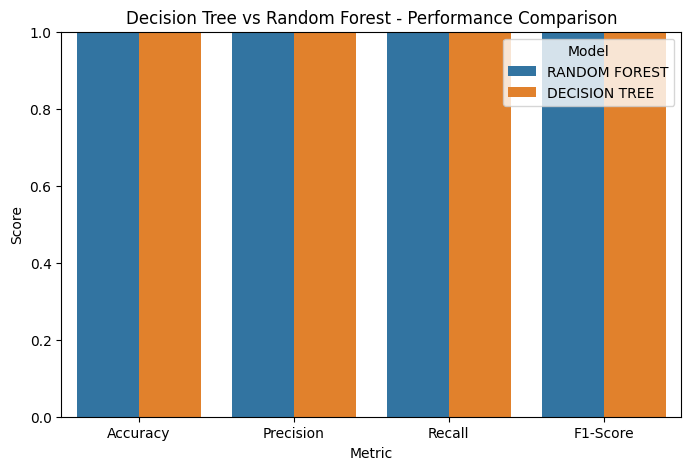

In [41]:
# =======================
#BAR CHART OF PERFORMANCE COMPARISON
# =======================

#THIS RESHAPES THE metrics_df DATAFRAME FROM WIDE TO LONG FORMAT, WHICH IS REQUIRED FOR sns.barplot().
#id_vars="Model": TELLS PANDAS TO KEEP THE 'Model' COLUMN INTACT.
#Var_name="Metric": NAMES THE NEW COLUMN THAT HOLDS THE METRIC NAMES ('Accuracy', 'Precision', etc.).
#value_name="Score": NAMES THE NEW COLUMN THAT HOLDS THE CORRESPONDING METRIC VALUES.

#CREATES A GROUPED BAR PLOT:
#x="Metric": X-AXIS SHOWS METRIC TYPE.
#y="Score": Y-AXIS SHOWS METRIC VALUE.
#hue="Model": CREATES BARS FOR EACH MODEL SIDE BY SIDE FOR COMPARISON.

#plt.title : ADDS TITLE, plt.ylim: SETS Y-AXIS RANGE TO [0, 1], plt.legend : ADDS A LEGEND, plt.show() : AND DISPLAYS THE PLOT.


metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(8, 5))
sns.barplot(x="Metric", y="Score", hue="Model", data=metrics_melted)
plt.title("Decision Tree vs Random Forest - Performance Comparison")
plt.ylim(0, 1)
plt.legend(title="Model")
plt.show()



C:\Users\xninj\AppData\Local\Temp\ipykernel_2072\2981829023.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette=color)


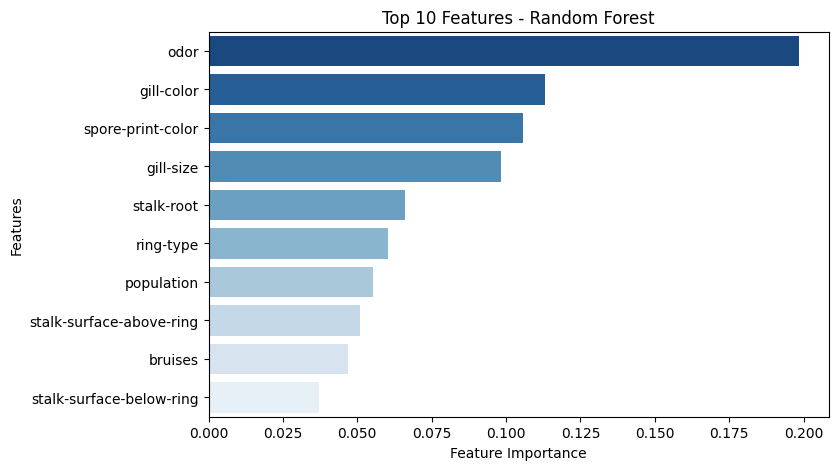

C:\Users\xninj\AppData\Local\Temp\ipykernel_2072\2981829023.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette=color)


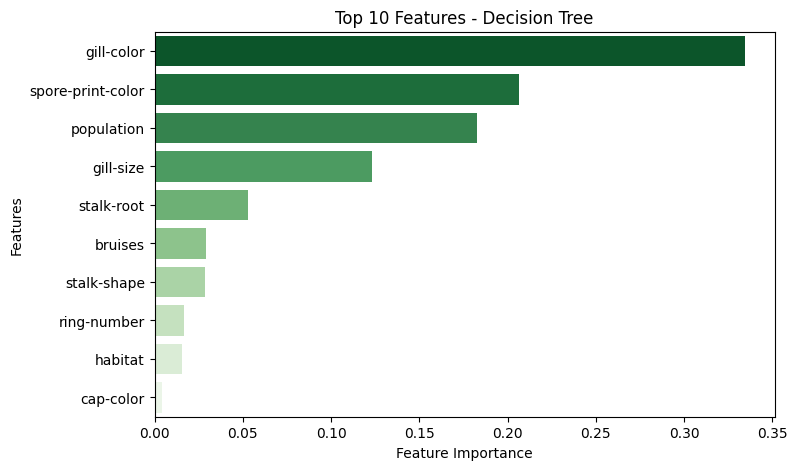

In [42]:
# =======================
# FEATURE IMPORTANCE PLOTS , MEASURING TOP 10 FEATURES USED THE MODELS
# =======================

# DEFINES A FUNCTION (def plot_feature_importance) THAT TAKES:
#model: A TRAINED MODEL (E.G., RANDOM FOREST OR DECISION TREE).
#X_train: TRAINING DATA (TO GET FEATURE NAMES).
#title: TITLE FOR THE PLOT.
#color: COLOR PALETTE FOR THE BARS (PASSED TO SEABORN).

#GETS FEATURE IMPORTANCE VALUES AND THE CORRESPONDING FEATURE NAMES : 
#importance = model.feature_importances_
#feature_names = X_train.columns
#BUILDS A DATAFRAME OF FEATURES AND THEIR IMPORTANCE SCORES, THEN SELECTS THE TOP 10 :
#feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
#feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10) 

#CREATES A HORIZONTAL BAR CHART OF THE TOP 10 FEATURES.
#plt.figure(figsize=(8, 5))
#sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette=color)

def plot_feature_importance(model, X_train, title, color):
    importance = model.feature_importances_
    feature_names = X_train.columns
    feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)  # Top 10

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette=color)
    plt.title(title)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.show()
    ##return plt.gcf()    it is used for returing the figure to create pdf. i just used this as comment now because now we dont need it, the pdf
    #already created.

# Plot for RANDOM FOREST
plot_feature_importance(random_forest_model, X_train, "Top 10 Features - Random Forest", "Blues_r")

# Plot for DECISION TREE
plot_feature_importance(decision_tree_model, X_train, "Top 10 Features - Decision Tree", "Greens_r")

# DETECTING THE OUTLIERS USING BOXPLOT IN SEABORN AND IN THIS I AM GOING TO DETECT THE OUTLIERS HIDDEN IN STALK-ROOT COLUMN
#AND YOU CAN CHANGE TO ANY COLUMN
#plt.figure(figsize=(10, 5))
#sns.boxplot(data=data_set['stalk-root'])  
#plt.title('Outliers in stalk-root')
#plt.show()


#SO WE HAVE FIND AN OUTLIER IN STALK ROOT COLUMN AND WE CAN DO TO REPLACE THE OUTLIER AS NAN AND CAN REMOVE THE NAN  
#OR CHANGE THE OUTLIER WITH MOST FREQUENT VALUE(MODE)
#[0] IS FOR PICKING THE FIRST MOST COMMON VALUE FROM THE SERIES, IT BECAUSE SOMETIMES MORE THAN ONE VALUE CAN BE MOST FREQUENT(TT WILL TIE),
#SO MODE WILL RETURN MULTIPLE VALUES 
#most_common = data_set['stalk-root'].mode()[0]
#data_set['stalk-root'].fillna(most_common, inplace = True)

# PDF CREATOR CODE

# =======================
# Create PDF Report confusion matrix
# =======================

from matplotlib.backends.backend_pdf 
import PdfPages
pdf_file = "Confusion_Matrix_report.pdf"
with PdfPages(pdf_file) as pdf:
    # 1. Confusion Matrices
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.heatmap(cm_random_forest, annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_title("Random Forest Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    sns.heatmap(cm_decision_tree, annot=True, fmt="d", cmap="Greens", ax=axes[1])
    axes[1].set_title("Decision Tree Confusion Matrix")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")

    plt.tight_layout()
    pdf.savefig(fig)  # Save the figure to the PDF
    plt.close(fig)

#PDF file for matrix bar chart

pdf_file = "Matrix Bar Chart.pdf"
with PdfPages(pdf_file) as pdf:
    metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
    plt.figure(figsize=(8, 5))
    sns.barplot(x="Metric", y="Score", hue="Model", data=metrics_melted)
    plt.title("Random Forest vs Decision Tree - Performance Comparison")
    plt.ylim(0, 1)
    plt.legend(title="Model")
    pdf.savefig()  # Save current figure
    plt.close()